In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Patch

df = pd.read_csv("../data/cleaned_census_data.csv")

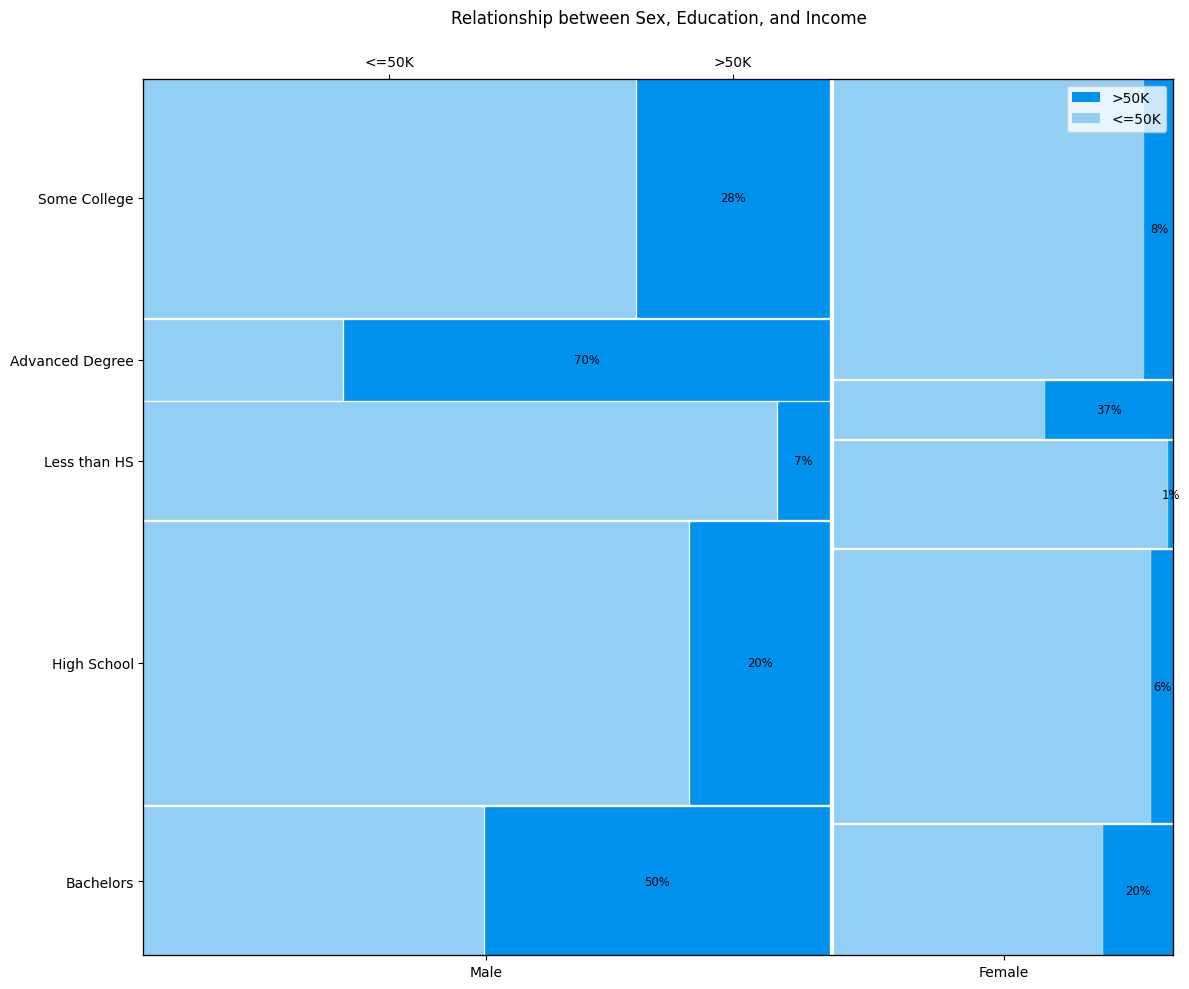

In [2]:
# Create education level bins
education_bins = {
    "Less than HS": [1, 2, 3, 4, 5, 6, 7, 8],
    "High School": [9],
    "Some College": [10, 11, 12],
    "Bachelors": [13],
    "Advanced Degree": [14, 15, 16],
}

# Apply education binning
df["education-level"] = df["education-num"].map(
    {num: bin_name for bin_name, nums in education_bins.items() for num in nums}
)

fig, ax = plt.subplots(figsize=(12, 10))

# Create a mosaic plot
mosaic(
    df,
    ["sex", "education-level", "income"],
    ax=ax,
    properties=lambda key: {
        "color": "#0092ed" if key[-1] == ">50K" else "#93cff5",
        "linewidth": 0.5,
    },
    labelizer=lambda key: (
        key[0]
        if len(key) == 1
        else (
            key[1]
            if len(key) == 2
            else (
                f"{int(df[(df['sex'] == key[0]) & (df['education-level'] == key[1]) & (df['income'] == key[2])].shape[0] / df[(df['sex'] == key[0]) & (df['education-level'] == key[1])].shape[0] * 100)}%"
                if key[2] == ">50K"
                else ""
            )
        )
    ),
)

plt.title("Relationship between Sex, Education, and Income", pad=40)
ax.legend(
    handles=[
        Patch(facecolor="#0092ed", label=">50K"),
        Patch(facecolor="#93cff5", label="<=50K"),
    ],
    loc="upper right",
)

plt.tight_layout()
plt.show()